# Automatically generating object masks with SAM
## Aileen Ni
## Milestone 2
### Based on https://samgeo.gishub.org/
#### Note- Change runtime to GPU

In [2]:
#Install required packages
%pip install segment-geospatial

In [3]:
#import packages
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

# Create interactive map

In [20]:
map= leafmap.Map(center=[37.4567, -122.3456], zoom=15, height="500px")
map.add_basemap("SATELLITE")
map
#specify boundaries for your image

Map(center=[37.4567, -122.3456], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [21]:
#Create bounding box
if map.user_roi_bounds() is not None:
  bbox= map.user_roi_bounds()
else:
  #default bounding box
  bbox=[-122.2345, 37.4567, -122.7890, 37.1234]

# Download the satellite image to output

In [24]:
image= "myimage.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

#or specify your own image
#image= 'custom image file'

Downloaded image 1/6
Downloaded image 2/6
Downloaded image 3/6
Downloaded image 4/6
Downloaded image 5/6
Downloaded image 6/6
Saving GeoTIFF. Please wait...
Image saved to myimage.tif


In [23]:
#Display image on the map
map.layers[-1].visible= False
map.add_raster(image, layer_name="Image")
map

Map(bottom=13009517.0, center=[37.43681358650177, -122.43134021759035], controls=(ZoomControl(options=['positi…

# Initialize SAM class


In [11]:
#download model to working directory
sam= SamGeo(model_type="vit_h", same_kwargs=None)

In [25]:
#Segment image using the SAM model

#unique=True assigns a unique ID to each object

sam.generate(image, output="mask.tif", foreground=True, unique=True)

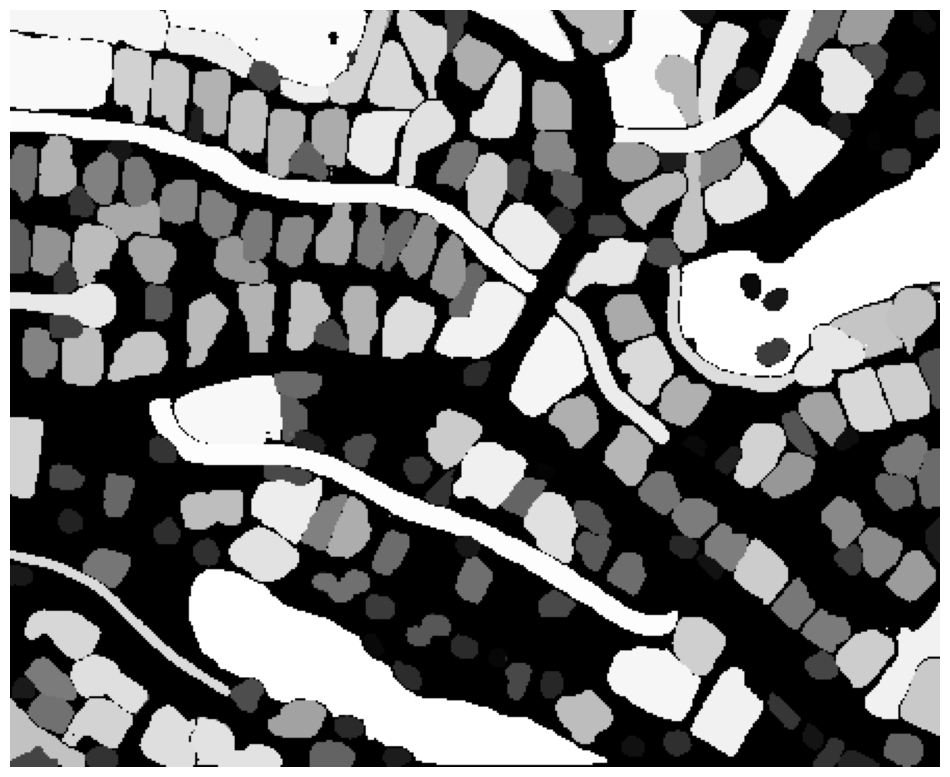

In [26]:
#Show mask
sam.show_masks(cmap="binary_r")

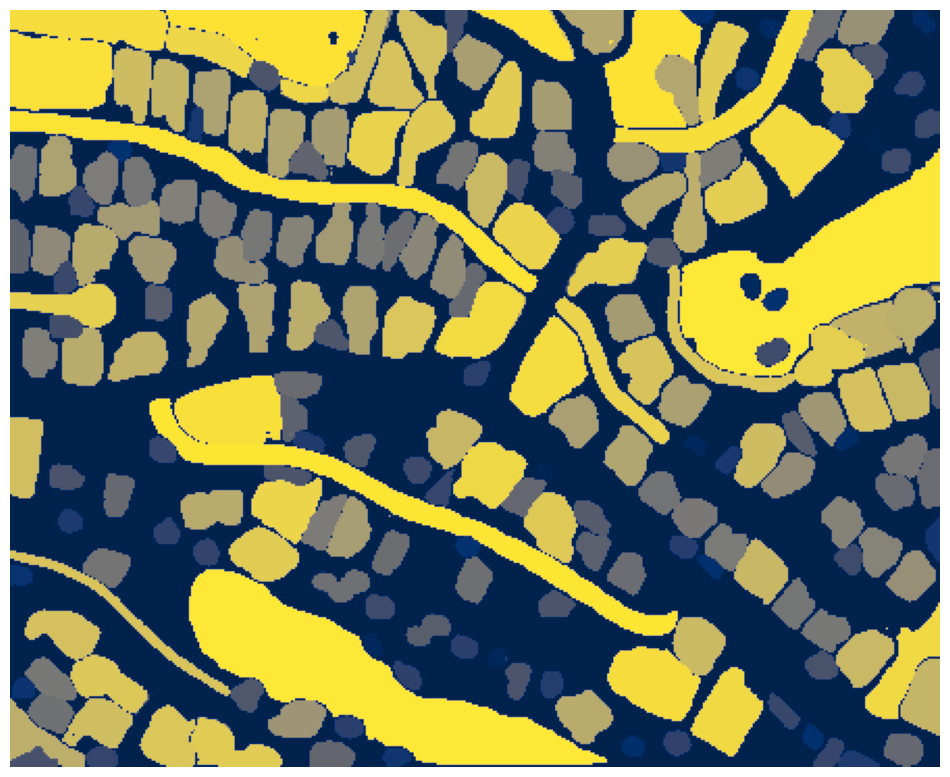

In [27]:
#Options: viridis, inferno, plasma, magma, cividis
sam.show_masks(cmap="cividis")

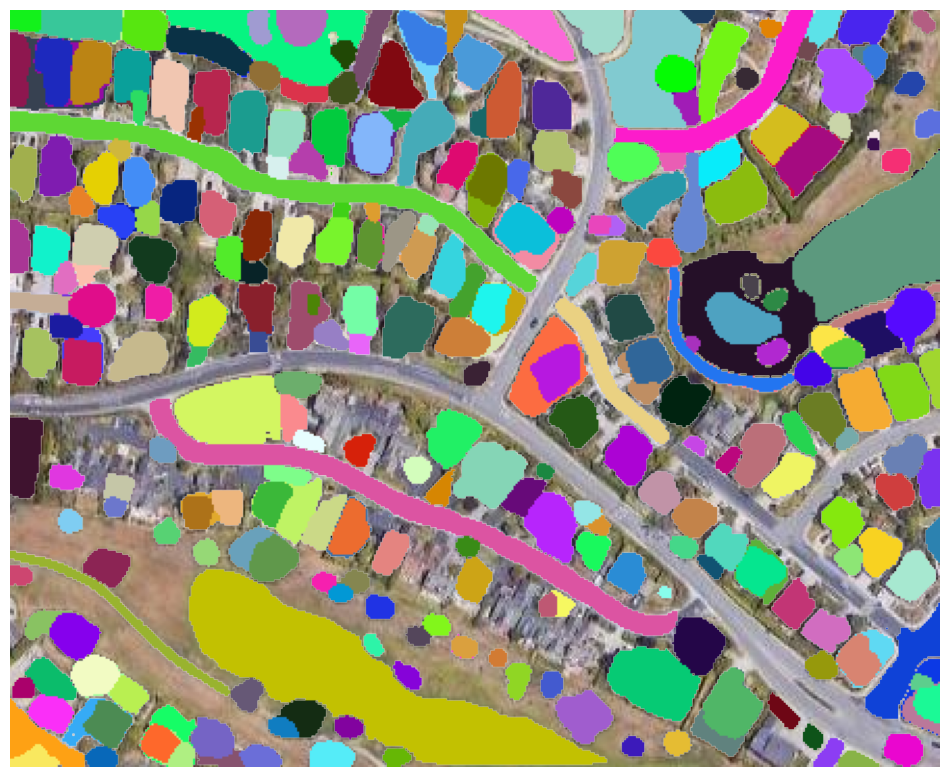

In [29]:
#Show with random color
sam.show_anns(axis="off", alpha=1, output="segmentimage.tif")


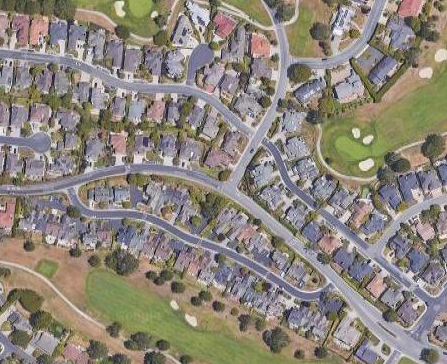
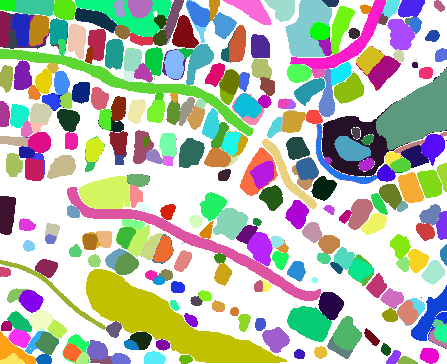

In [30]:
#Use a slider to compare the original image to the segmented image
leafmap.image_comparison(
    image,
    "segmentimage.tif",
    label1="Image",
    label2="Segmentation"
)

In [31]:
#Add image to the map
map.add_raster("segmentimage.tif", alpha=0.5, layer_name="Masks")
map

Map(bottom=13009548.0, center=[37.43654949841412, -122.43150115013124], controls=(ZoomControl(options=['positi…

In [32]:
#Convert to vector format
sam.tiff_to_vector("mask.tif","masks.gpkg")

# Automatic mask generation options

In [33]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 100,
}

In [34]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)

In [37]:
sam.generate(image, output="mask2.tif", foreground=True)

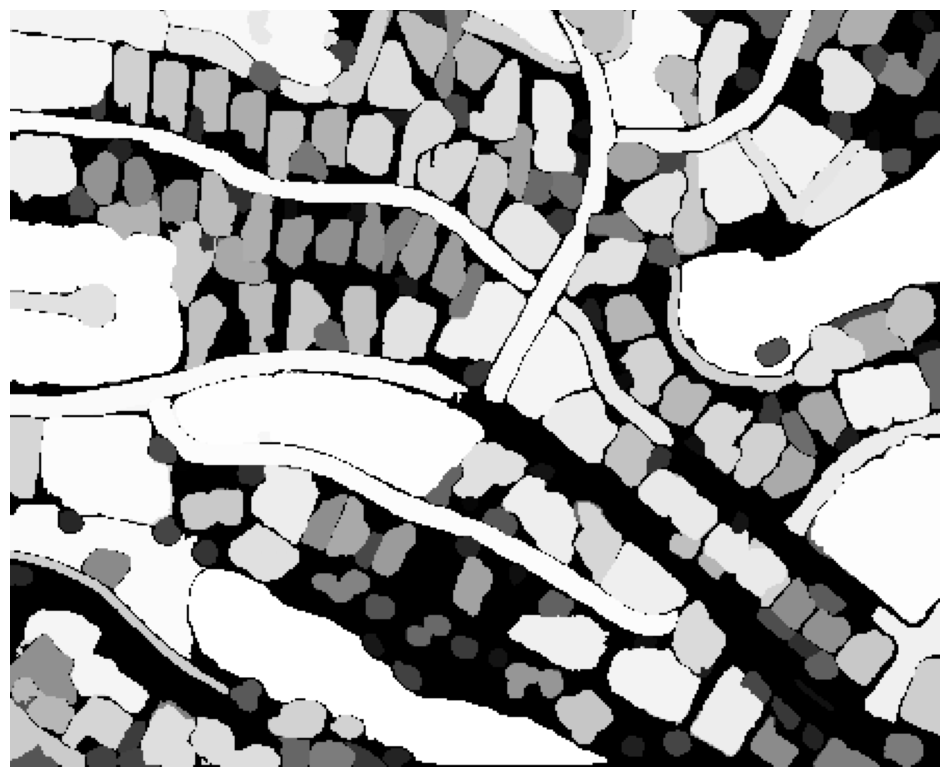

In [38]:
sam.show_masks(cmap="binary_r")

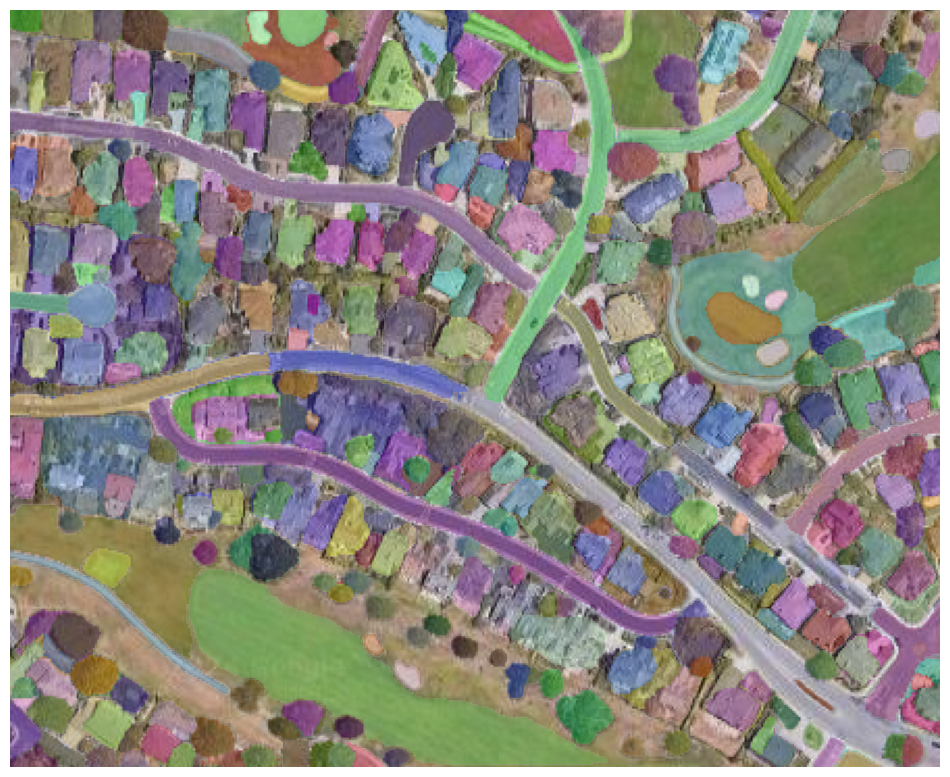

In [39]:
sam.show_anns(axis="off", opacity=1, output="segmentimage2.tif")


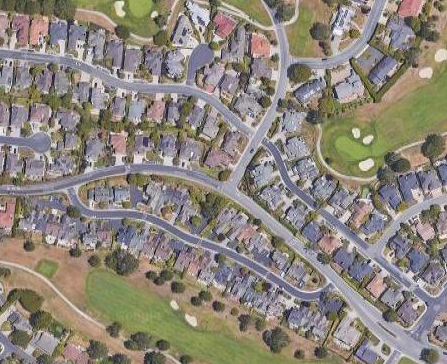
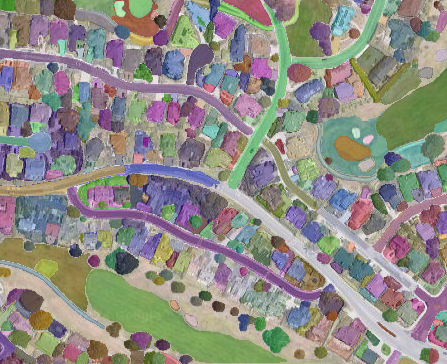

In [40]:
#Use a slider to compare the original image to the segmented image
leafmap.image_comparison(
    image,
    "segmentimage2.tif",
    label1="Image",
    label2="Segmentation"
)


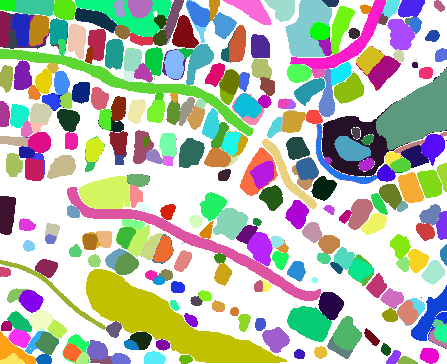
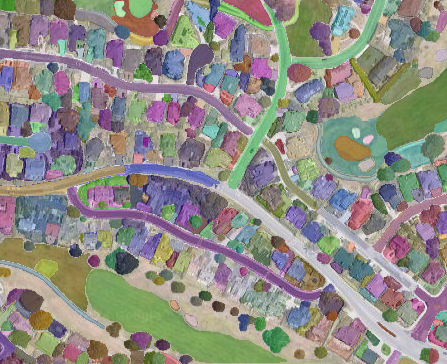

In [42]:
#Compare first segment image to second segment image
leafmap.image_comparison(
    "segmentimage.tif",
    "segmentimage2.tif",
    label1="Segmentation1",
    label2="Segmentation2"
)

In [53]:
#Overlay the annotations on the image and use the slider to change the opacity interactively
overlay_images(image, "segmentimage2.tif", backend="TKAgg")

The TkAgg backend is not supported in Google Colab. The overlay_images function will not work on Colab.
